In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

#import yfinance as yf

total_bars = 353*14
sims = 10000
strat_lr = 0.1857
long = -1 ### long = 1 | short = -1


lr_df = pd.DataFrame()

#history = yf.download('^GSPC', start='2000-1-1', auto_adjust=True)
history = pd.read_csv('data/CL_TS_2007_2021_H1.csv')

In [2]:
history['LR'] = (np.log(history['Close']) - np.log(history['Close'].shift())) * long

for i in tqdm(range(sims)):
    
    lr_df.loc[i, 'random'] = history.sample(n=total_bars)['LR'].sum()


pval = lr_df[lr_df['random'] > strat_lr].shape[0] / lr_df.shape[0] 
    
print(f'pval: {pval}')

lr_df.describe()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:47<00:00, 209.59it/s]

pval: 0.3448


,random
count,10000.000000
mean,0.040204
std,0.403465
min,-1.442557
25%,-0.231129
50%,0.035406
75%,0.296246
max,1.641262


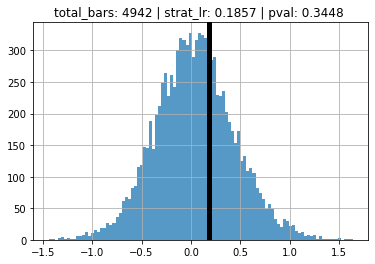

In [3]:
lr_df.hist(bins=int(np.sqrt(len(lr_df))), alpha=0.75)
plt.axvline(strat_lr, color='k', linewidth=5)
plt.title(f'total_bars: {total_bars} | strat_lr: {strat_lr} | pval: {pval} ')
plt.show()